In [2]:
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.default_rng()

In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import h5py
import numpy as np

In [6]:
!pip install obspy

In [6]:
import obspy
import h5py
from obspy import UTCDateTime
import numpy as np
from obspy.clients.fdsn.client import Client
import matplotlib.pyplot as plt

def make_stream(dataset):
    '''
    input: hdf5 dataset
    output: obspy stream

    '''
    data = np.array(dataset)

    tr_E = obspy.Trace(data=data[:, 0])
    tr_E.stats.starttime = UTCDateTime(dataset.attrs['trace_start_time'])
    tr_E.stats.delta = 0.01
    tr_E.stats.channel = dataset.attrs['receiver_type']+'E'
    tr_E.stats.station = dataset.attrs['receiver_code']
    tr_E.stats.network = dataset.attrs['network_code']

    tr_N = obspy.Trace(data=data[:, 1])
    tr_N.stats.starttime = UTCDateTime(dataset.attrs['trace_start_time'])
    tr_N.stats.delta = 0.01
    tr_N.stats.channel = dataset.attrs['receiver_type']+'N'
    tr_N.stats.station = dataset.attrs['receiver_code']
    tr_N.stats.network = dataset.attrs['network_code']

    tr_Z = obspy.Trace(data=data[:, 2])
    tr_Z.stats.starttime = UTCDateTime(dataset.attrs['trace_start_time'])
    tr_Z.stats.delta = 0.01
    tr_Z.stats.channel = dataset.attrs['receiver_type']+'Z'
    tr_Z.stats.station = dataset.attrs['receiver_code']
    tr_Z.stats.network = dataset.attrs['network_code']

    stream = obspy.Stream([tr_E, tr_N, tr_Z])

    return stream

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def rgb2list(rgb):
    return np.dot(rgb[...,:3], [0.333333, 0.333333, 0.333333])

In [ ]:
from PIL import Image
from numpy import asarray
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def getimglist(fileName, setStart, setEnd, startIndex, endIndex):
  # fileName: like 'drive/Shareddrives/anomalyResearch/chunk1/chunk1.hdf5'
  # setStart: start index of dataset chosen
  # setEnd: end index of dataset chosen
  # startIndex: start position of choosen slide window
  # endIndex: end position of choosen slide window
  file_name = fileName
  dtf1 = h5py.File(file_name,'r')
  data_group = dtf1["data"]

  data_keys = list(data_group.keys())
  fileList = data_keys[setStart:setEnd]

  sample_list = []
  #time_list = []
  #image_list = []
  for i in range(len(fileList)):
     sub_name = "data/" + fileList[i] + ""
     #print(sub_name)
     dataset = dtf1.get(sub_name)
     st = make_stream(dataset)
     
     #print(max(st[2]))
     st_list = list(st[2][startIndex:endIndex])
     #sample_list.extend(st_list)
     #make_plot(st[2], title='Raw Data', ylab='counts')
     st_array = np.array(st_list)
     sample_list.append(st_array)
  return sample_list


In [ ]:
fileName = 'drive/Shareddrives/anomalyResearch/chunk1/chunk1.hdf5'

noise_train = getimglist(fileName=fileName, setStart=0, setEnd=10000, startIndex=1501, endIndex=2901)

In [ ]:
noise_train = np.array(noise_train)
pd.DataFrame(noise_train).to_csv("drive/MyDrive/noise_train_w15.csv",header=None, index=None)

In [ ]:
fileName = 'drive/Shareddrives/anomalyResearch/chunk1/chunk1.hdf5'

noise_test = getimglist(fileName=fileName, setStart=10001, setEnd=12001, startIndex=1501, endIndex=2901)

In [ ]:
noise_test = np.array(noise_test)
pd.DataFrame(noise_test).to_csv("drive/MyDrive/noise_test_w15.csv",header=None, index=None)

In [ ]:
fileName = 'drive/Shareddrives/anomalyResearch/chunk3/chunk3.hdf5'

earth_test = getimglist(fileName=fileName, setStart=10001, setEnd=12001, startIndex=1501, endIndex=2901)

In [ ]:
earth_test = np.array(earth_test)
pd.DataFrame(earth_test).to_csv("drive/MyDrive/earth_test_w15.csv",header=None, index=None)

In [ ]:
fileName = 'drive/Shareddrives/anomalyResearch/chunk3/chunk3.hdf5'

earth_train = getimglist(fileName=fileName, setStart=0, setEnd=10000, startIndex=1501, endIndex=2901)

In [ ]:
earth_test = np.array(earth_train)
pd.DataFrame(earth_train).to_csv("drive/MyDrive/earth_train_w15.csv",header=None, index=None)

In [7]:
train_noise = pd.read_csv("drive/MyDrive/noise_train_w15.csv",header=None)

In [8]:
train_earth = pd.read_csv("drive/MyDrive/earth_train_w15.csv",header=None)

In [9]:
noise = np.array(train_noise)
earth = np.array(train_earth)

In [10]:
train = np.vstack((noise,earth))

In [11]:
test_noise = pd.read_csv("drive/MyDrive/noise_test_w15.csv",header=None)
test_earth = pd.read_csv("drive/MyDrive/earth_test_w15.csv",header=None)

In [12]:
noise_test = np.array(test_noise)
earth_test = np.array(test_earth)

In [13]:
test_data = np.vstack((noise_test,earth_test))

In [14]:
signals = tf.reshape(test_data[0],[1,-1])
test = tf.signal.stft(signals, frame_length=100, frame_step=20)
magnitude_spectrograms = tf.abs(test)
array = magnitude_spectrograms.numpy().astype(np.float)[0]

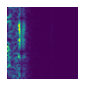

In [15]:
sizes = np.shape(array)     
fig = plt.figure()
fig.set_size_inches(1. * sizes[0] / sizes[1], 1, forward = False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
ax.imshow(array)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()
  

In [16]:
import matplotlib.pyplot as plt

def save_image(data, filename):
    sizes = np.shape(data)     
    fig = plt.figure()
    fig.set_size_inches(1. * sizes[0] / sizes[1], 1, forward = False)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    ax.imshow(data)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.savefig(filename, dpi = 28, cmap='hot') 
    plt.close()


FileNotFoundError: ignored

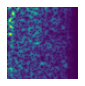

In [18]:
for i in range(0,4000):
    signals = tf.reshape(test_data[i],[1,-1])
    test = tf.signal.stft(signals, frame_length=100, frame_step=20)
    magnitude_spectrograms = tf.abs(test)
    array = magnitude_spectrograms.numpy().astype(np.float)[0]
    save_image(array, 'drive/Shareddrives/anomalyResearch/w15-test/'+str(i)+'.png')

KeyboardInterrupt: ignored

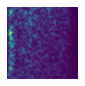

In [ ]:
for i in range(0,20000):
    signals = tf.reshape(train[i],[1,-1])
    test = tf.signal.stft(signals, frame_length=100, frame_step=20)
    magnitude_spectrograms = tf.abs(test)
    array = magnitude_spectrograms.numpy().astype(np.float)[0]
    save_image(array, 'drive/Shareddrives/anomalyResearch/w15/'+str(i)+'.png')

In [ ]:
from PIL import Image
from numpy import asarray
# load the image
vae_train_data = []
for i in range(0,20000):
    image = Image.open('drive/Shareddrives/anomalyResearch/w15/'+str(i)+'.png')
    # convert image to numpy array
    data = asarray(image)
    data = np.dot(data[...,:3], [0.2989, 0.5870, 0.1140])/255
    #data = np.reshape(data, [-1,28, 41]) / 255
    #vae_data.extend(data)
    vae_train_data.append(data)

KeyboardInterrupt: ignored

In [ ]:
from PIL import Image
from numpy import asarray
vae_test_data = []
for i in range(0,4000):
    image = Image.open('drive/Shareddrives/anomalyResearch/w15-test/'+str(i)+'.png')
    # convert image to numpy array
    data = asarray(image)
    data = np.dot(data[...,:3], [0.2989, 0.5870, 0.1140])/255
    #data = np.reshape(data, [-1,28, 41]) / 255
    #vae_data.extend(data)
    vae_test_data.append(data)

In [ ]:
vae_train_data = np.array(vae_train_data)
vae_test_data = np.array(vae_test_data)

In [ ]:
mnist_digits = np.concatenate([vae_train_data, vae_test_data], axis=0)
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") 
mnist_digits.shape

(24000, 28, 28, 1)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [ ]:
latent_dim = 4

encoder_inputs = keras.Input(shape=(28, 28, 1))
x = keras.Sequential()(encoder_inputs)
x = layers.Conv2D(32, 3, activation="sigmoid", strides=2, padding="same")(x)
x = layers.MaxPool2D(pool_size=(2,2))(x)
x = layers.Conv2D(64, 3, activation="sigmoid", strides=2, padding="same")(x)
x = layers.MaxPool2D(pool_size=(2,2))(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
sequential_2 (Sequential)       multiple             0           input_7[0][0]                    
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 14, 14, 32)   320         sequential_2[0][0]               
__________________________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)  (None, 7, 7, 32)     0           conv2d_4[0][0]                   
____________________________________________________________________________________________

In [ ]:
latent_inputs = keras.Input(shape=(latent_dim,))
x = keras.Sequential()(latent_inputs)
x = layers.Dense(7 * 7 * 64, activation="relu")(x)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="sigmoid", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="sigmoid", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
sequential_4 (Sequential)    multiple                  0         
_________________________________________________________________
dense_6 (Dense)              (None, 3136)              15680     
_________________________________________________________________
reshape_3 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose_9 (Conv2DTr (None, 14, 14, 64)        36928     
_________________________________________________________________
conv2d_transpose_10 (Conv2DT (None, 28, 28, 32)        18464     
_________________________________________________________________
conv2d_transpose_11 (Conv2DT (None, 28, 28, 1)         289 

In [ ]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

In [ ]:
vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(mnist_digits, epochs=30, batch_size=128)

Epoch 1/30
188/188 [==============================] - 35s 182ms/step - loss: 411.8428 - reconstruction_loss: 393.1814 - kl_loss: 0.0036
Epoch 2/30
188/188 [==============================] - 34s 182ms/step - loss: 384.7247 - reconstruction_loss: 384.7259 - kl_loss: 0.0015
Epoch 3/30
188/188 [==============================] - 35s 184ms/step - loss: 384.4180 - reconstruction_loss: 384.4931 - kl_loss: 8.5198e-05
Epoch 4/30
188/188 [==============================] - 34s 181ms/step - loss: 384.0153 - reconstruction_loss: 384.4720 - kl_loss: 7.2169e-05
Epoch 5/30
188/188 [==============================] - 34s 183ms/step - loss: 384.4713 - reconstruction_loss: 384.4637 - kl_loss: 5.0647e-05
Epoch 6/30
188/188 [==============================] - 34s 183ms/step - loss: 384.3916 - reconstruction_loss: 384.4854 - kl_loss: 3.9191e-05
Epoch 7/30
188/188 [==============================] - 34s 182ms/step - loss: 383.9507 - reconstruction_loss: 384.4813 - kl_loss: 3.8393e-05
Epoch 8/30
188/188 [========

In [ ]:
latent_dim = 16

encoder_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.MaxPool2D(pool_size=(2,2))(x)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.MaxPool2D(pool_size=(2,2))(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 14, 14, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 7, 7, 32)     0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 4, 4, 64)     18496       max_pooling2d[0][0]              
____________________________________________________________________________________________

In [ ]:
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 16)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 3136)              53312     
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 64)        36928     
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 32)        18464     
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 28, 28, 1)         289       
Total params: 108,993
Trainable params: 108,993
Non-trainable params: 0
_____________________________________________________

In [ ]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

In [ ]:
vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(mnist_digits, epochs=30, batch_size=128)

Epoch 1/30
188/188 [==============================] - 35s 180ms/step - loss: 426.3022 - reconstruction_loss: 398.3704 - kl_loss: 0.0949
Epoch 2/30
188/188 [==============================] - 34s 180ms/step - loss: 383.9557 - reconstruction_loss: 382.6103 - kl_loss: 0.7664
Epoch 3/30
188/188 [==============================] - 34s 180ms/step - loss: 381.9826 - reconstruction_loss: 380.1646 - kl_loss: 1.3555
Epoch 4/30
188/188 [==============================] - 34s 180ms/step - loss: 381.5714 - reconstruction_loss: 379.5526 - kl_loss: 1.3444
Epoch 5/30
188/188 [==============================] - 34s 179ms/step - loss: 380.5265 - reconstruction_loss: 379.2514 - kl_loss: 1.4210
Epoch 6/30
188/188 [==============================] - 34s 181ms/step - loss: 380.7207 - reconstruction_loss: 379.1050 - kl_loss: 1.4951
Epoch 7/30
188/188 [==============================] - 34s 179ms/step - loss: 380.5946 - reconstruction_loss: 379.0121 - kl_loss: 1.5396
Epoch 8/30
188/188 [============================

In [ ]:
for i in range(10,20):
  print (i)

10
11
12
13
14
15
16
17
18
19


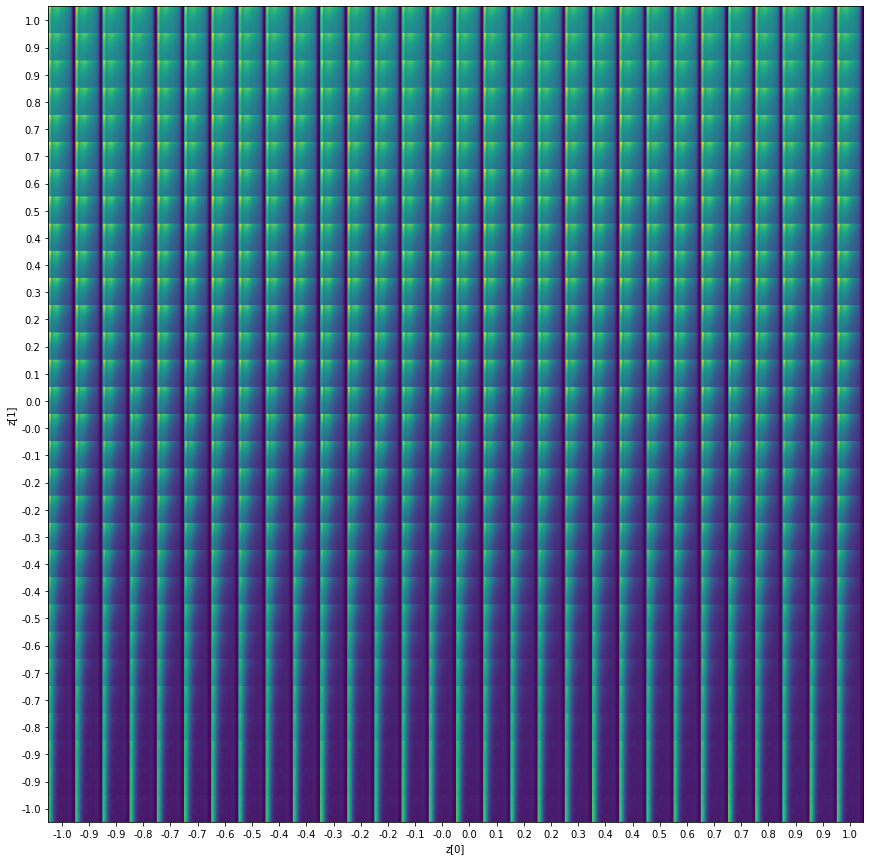

In [ ]:
import matplotlib.pyplot as plt


def plot_latent_space(vae, n=30, figsize=15):
    # display a n*n 2D manifold of digits
    digit_size = 28
    scale = 1.0
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = vae.decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[
                i * digit_size : (i + 1) * digit_size,
                j * digit_size : (j + 1) * digit_size,
            ] = digit

    plt.figure(figsize=(figsize, figsize))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    #plt.imshow(figure, cmap="Greys_r")
    plt.imshow(figure)
    plt.show()
    #plt.savefig('drive/MyDrive/result.png') 
    #plt.close()


plot_latent_space(vae)